Importando as bibliotecas necessárias 

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Realizando a leitura do arquivo csv

In [3]:
df = pd.read_csv("Cancer_Data.csv")

#Manipulando os dados 
- Separando os labels e os valores
- Normalizando os valores

In [4]:
dataValues = df.iloc[:, 2:-1].values
dataLabels = df.iloc[:, 1:2].values


#Normalizando os valores antes de realizar o treino
dataValues = (dataValues - np.mean(dataValues, axis=0)) / np.std(dataValues, axis=0)

#Utilizando o método de Cross-Validation para encontrar os melhores parâmetros para execução do MLP



Separando o conjunto de dados em treinamento e de teste

In [5]:
x_train, x_test, y_train, y_test = train_test_split(dataValues, dataLabels, test_size=0.25, random_state=42)

Criando um dicionário com diferentes modelos MLP com diferentes variáveis

In [6]:
listModels = {
 "MLP default values" : MLPClassifier(random_state=1),
 "MLP with 10 iterations (default = 200)": MLPClassifier(random_state=1, max_iter=10),
 "MLP with 10000 iterations (default = 200)": MLPClassifier(random_state=1, max_iter=10000),
 "MLP Increase the number of hidden_layer_sizes to 500 (default = 100)": MLPClassifier(random_state=1, hidden_layer_sizes=(500,)),
 "MLP decrease the number of hidden_layer_sizes to 10 (default = 100)": MLPClassifier(random_state=1, hidden_layer_sizes=(10,)),
 "MLP usign logistic activation function (default = 'relu')": MLPClassifier(random_state=1, activation='logistic'),
 "MLP usign identity activation function (default = 'relu')": MLPClassifier(random_state=1, activation='identity'),
 "MLP usign lbfgs solver (default = 'adam')": MLPClassifier(random_state=1, solver='lbfgs'),
 "MLP usign sgd solver (default = 'adam')": MLPClassifier(random_state=1, solver='sgd'),
 "MLP usign adaptive as learning rate (default = 'constant')": MLPClassifier(random_state=1, solver='sgd', learning_rate='adaptive'),
 "MLP usign invscaling as learning rate (default = 'constant')": MLPClassifier(random_state=1, solver='sgd', learning_rate='invscaling'),
}

listValidation = []
listAccuracyTrain = []
listAccuracyTest = []

Executando esses diferentes modelos e testando:
- Sua média de score no crossvalidation
- Sua acurácia de treino
- Sua acurácia de test





### MLP default values ###
Validation Score 0.9719142990218911
Accuracy train: 0.9929577464788732
Accuracy test: 0.972027972027972



### MLP forcing Underfitting ###
Validation Score 0.9455674584691819
Accuracy train: 0.9553990610328639
Accuracy test: 0.9440559440559441



### MLP forcing Overfitting ###
Validation Score 0.9754230709517155
Accuracy train: 0.9953051643192489
Accuracy test: 0.965034965034965



### MLP Increase the number of hidden_layer_sizes (default = 100) ###
Validation Score 0.9754230709517155
Accuracy train: 1.0
Accuracy test: 0.972027972027972



### MLP decrease the number of hidden_layer_sizes (default = 100) ###
Validation Score 0.9754075454122031
Accuracy train: 0.9859154929577465
Accuracy test: 0.972027972027972



### MLP usign logistic activation function (default = 'relu') ###
Validation Score 0.9771619313771154
Accuracy train: 0.9859154929577465
Accuracy test: 0.993006993006993



### MLP usign identity activation function (default = 'relu') ###
Valid

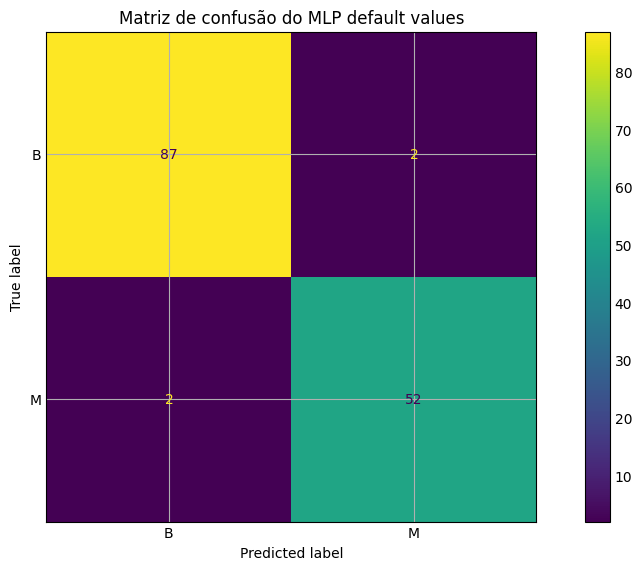

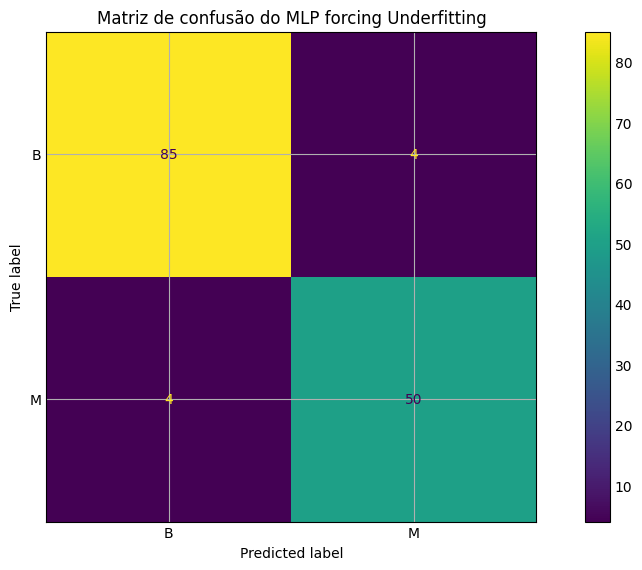

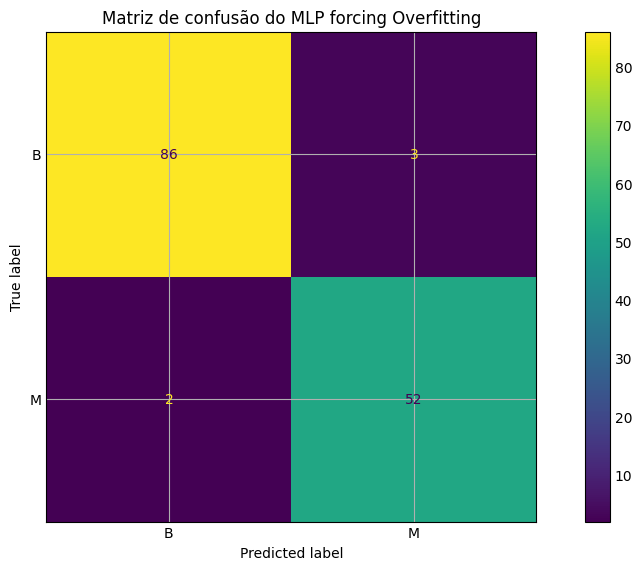

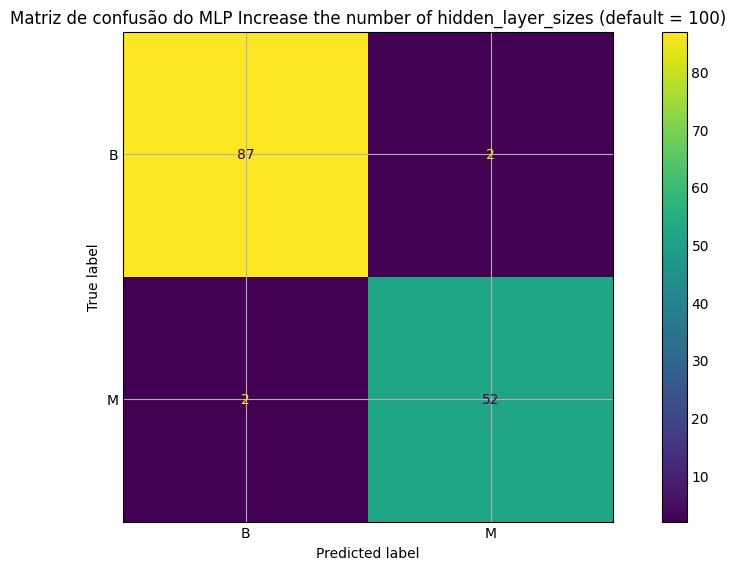

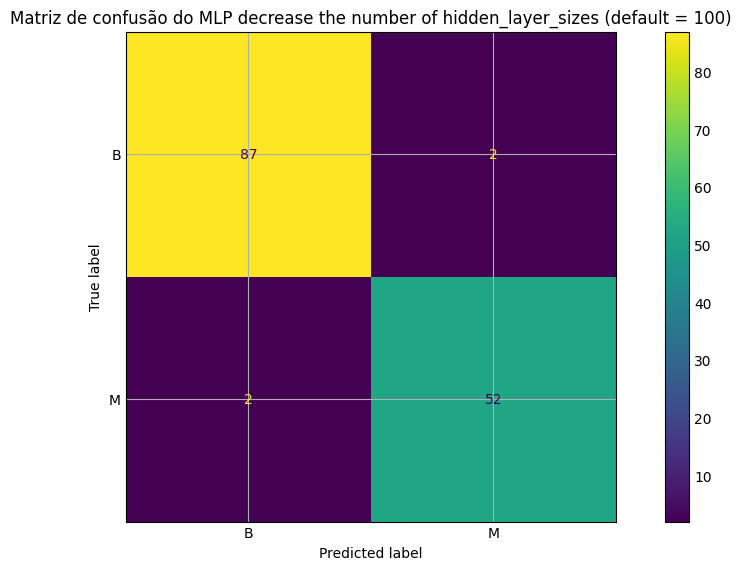

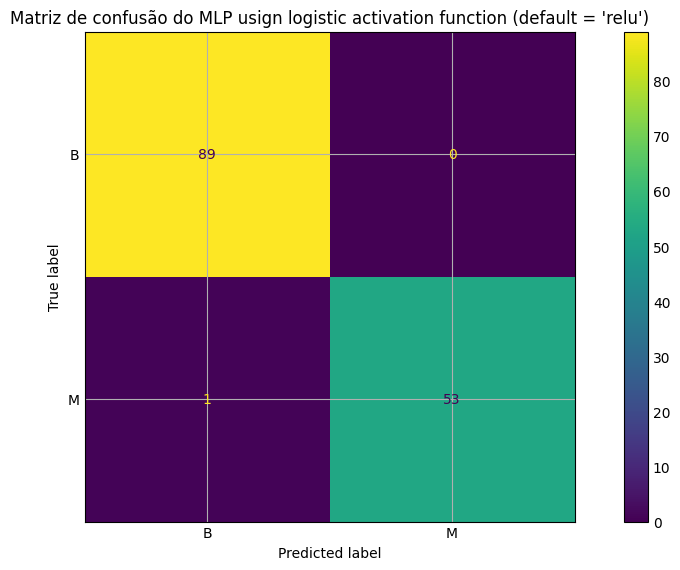

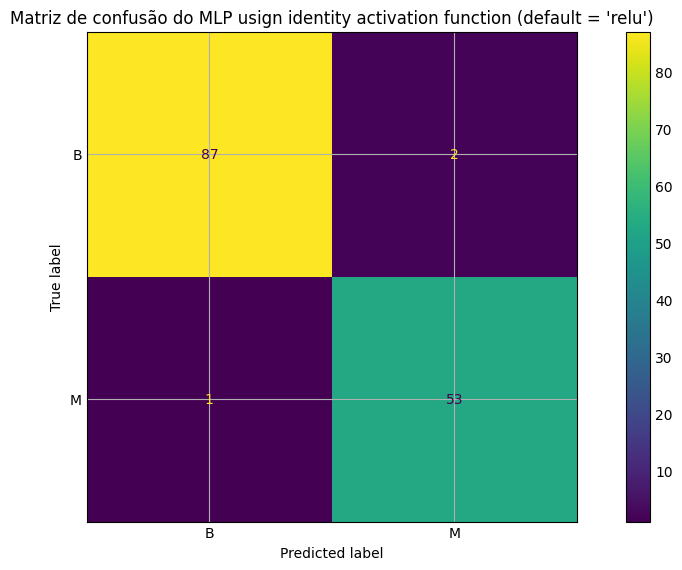

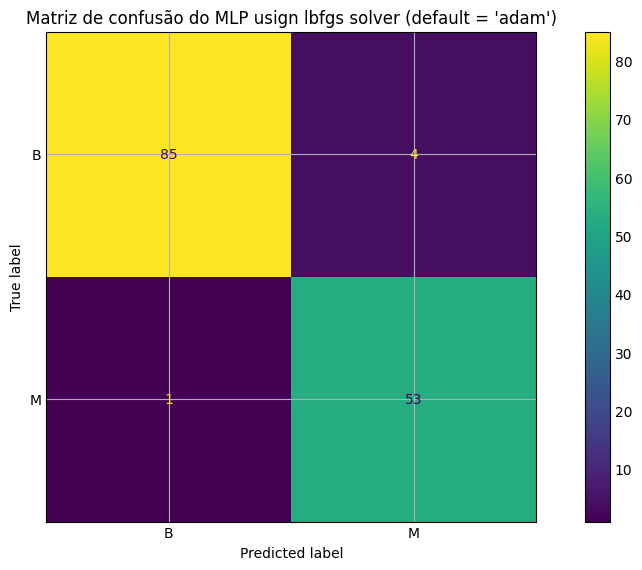

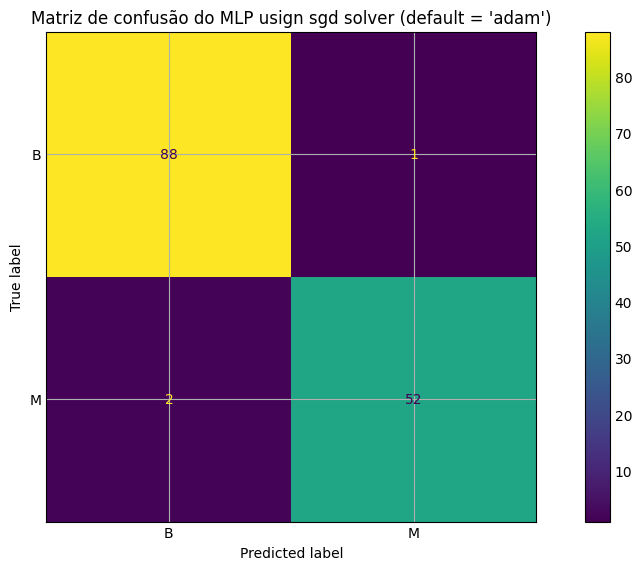

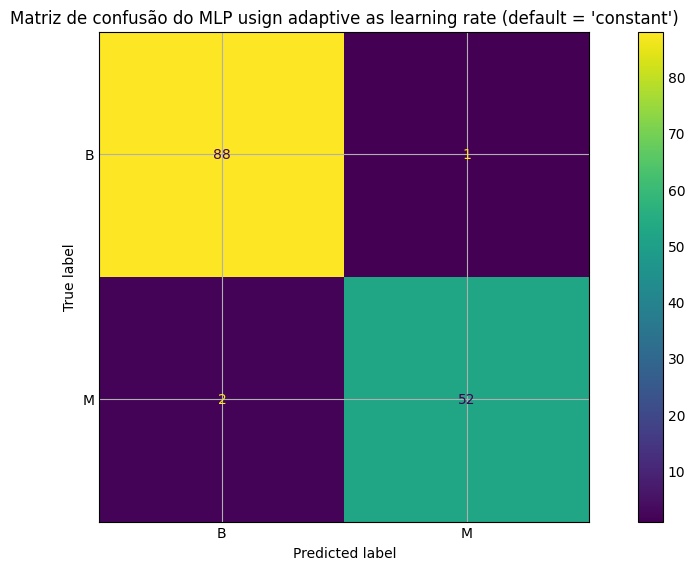

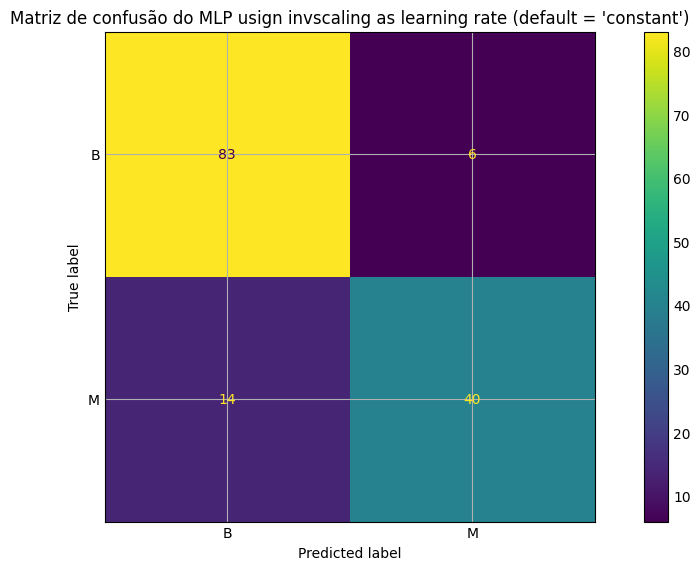

In [7]:
for name, model in listModels.items():

  print(f"\n\n\n### {name} ###")

  #Usigin the Cross Validation to train the model
  scores = cross_val_score(model, dataValues,dataLabels, cv=5)
  mean_score = np.mean(scores)
  listValidation.append(mean_score)
  print("Validation Score", mean_score)

  #Trainning the Model
  model = model.fit(x_train, y_train)
  modelPredict = model.predict(x_train)
  accuracy = accuracy_score(y_train, modelPredict)
  listAccuracyTrain.append(accuracy)
  print(f"Accuracy train: {accuracy}")

  #Verify the accuracy with the data of test
  modelPredict = model.predict(x_test)
  accuracy = accuracy_score(y_test, modelPredict)
  listAccuracyTest.append(accuracy)
  print(f"Accuracy test: {accuracy}")
  
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
  _ = ax.set_title(f"Matriz de confusão do {name}")

Plotando os resultados obtidos nos diferentes modelos

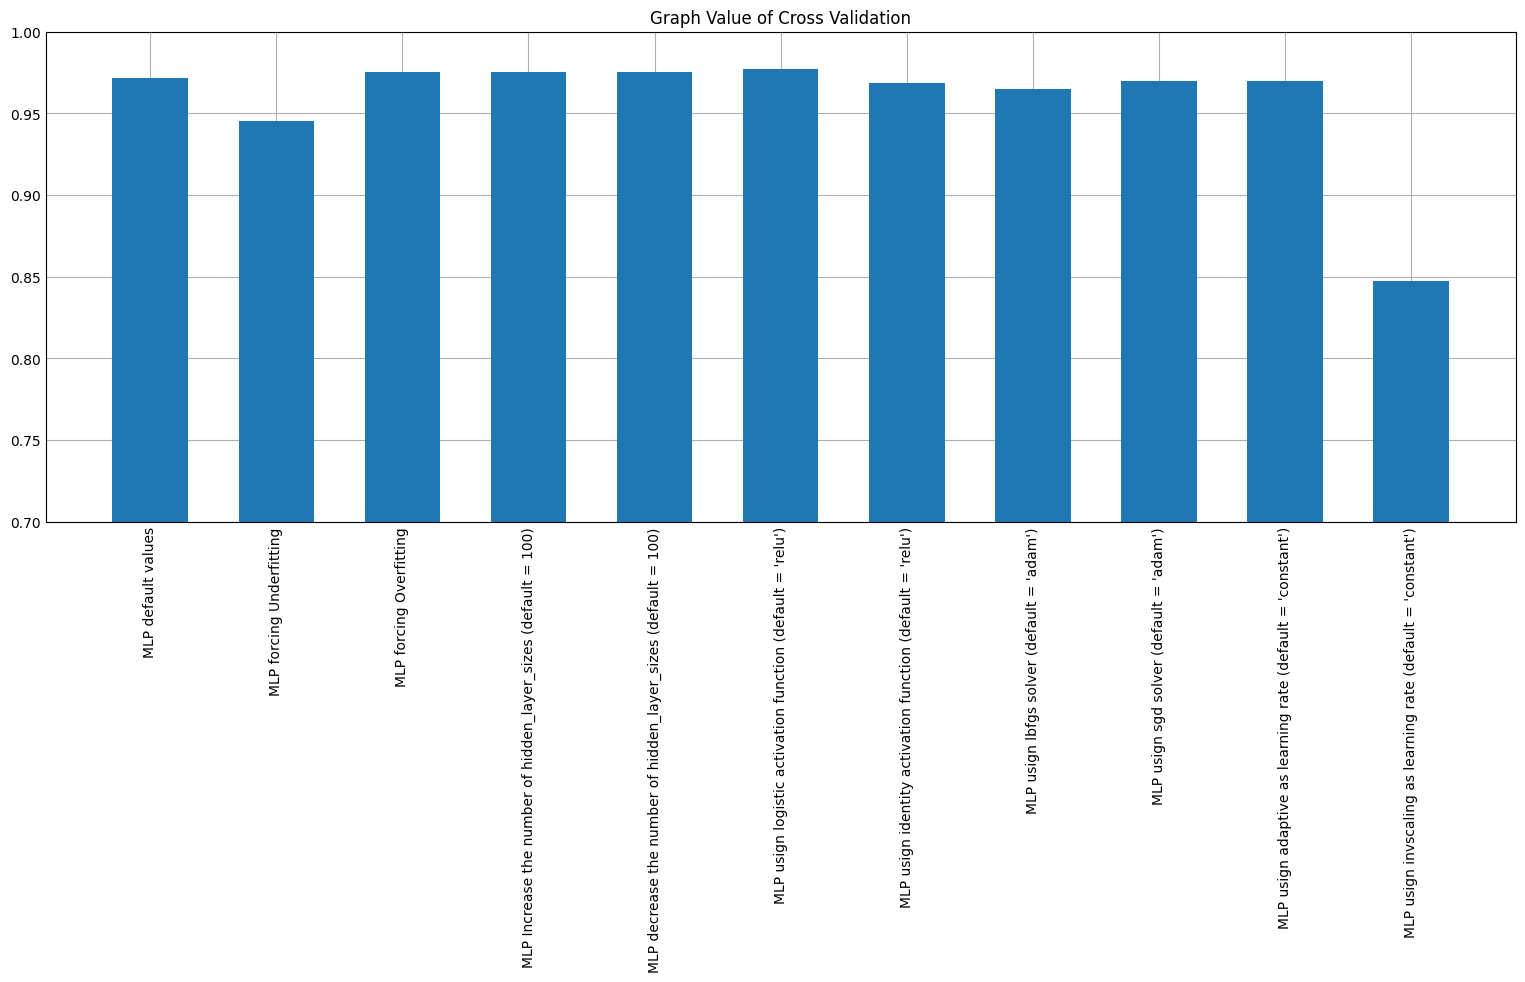

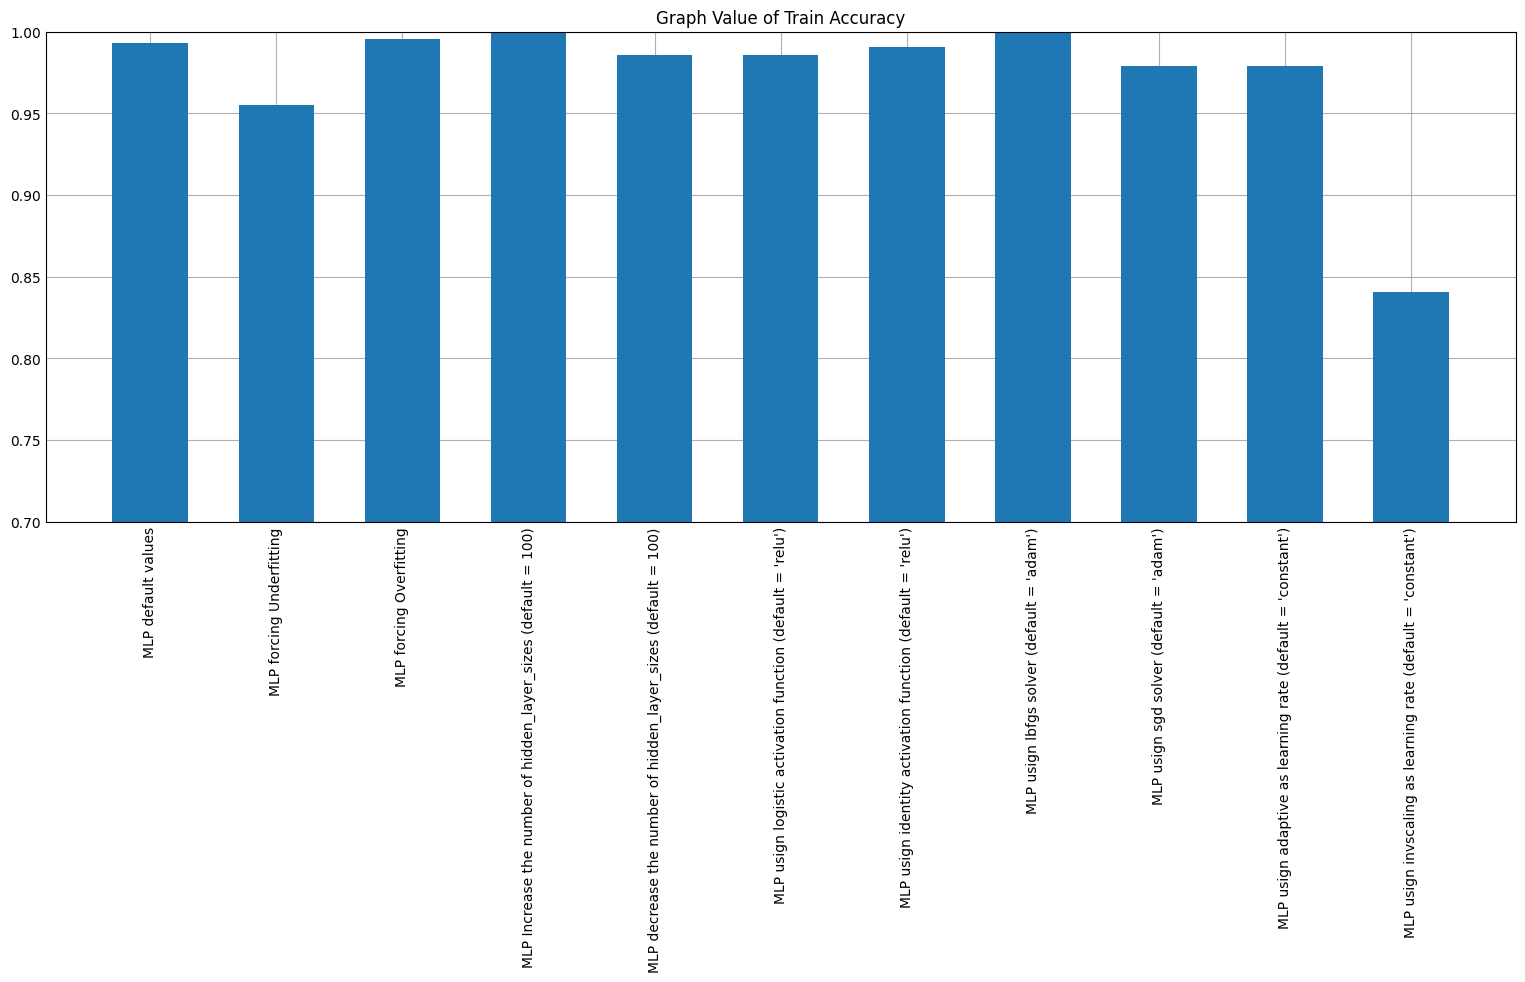

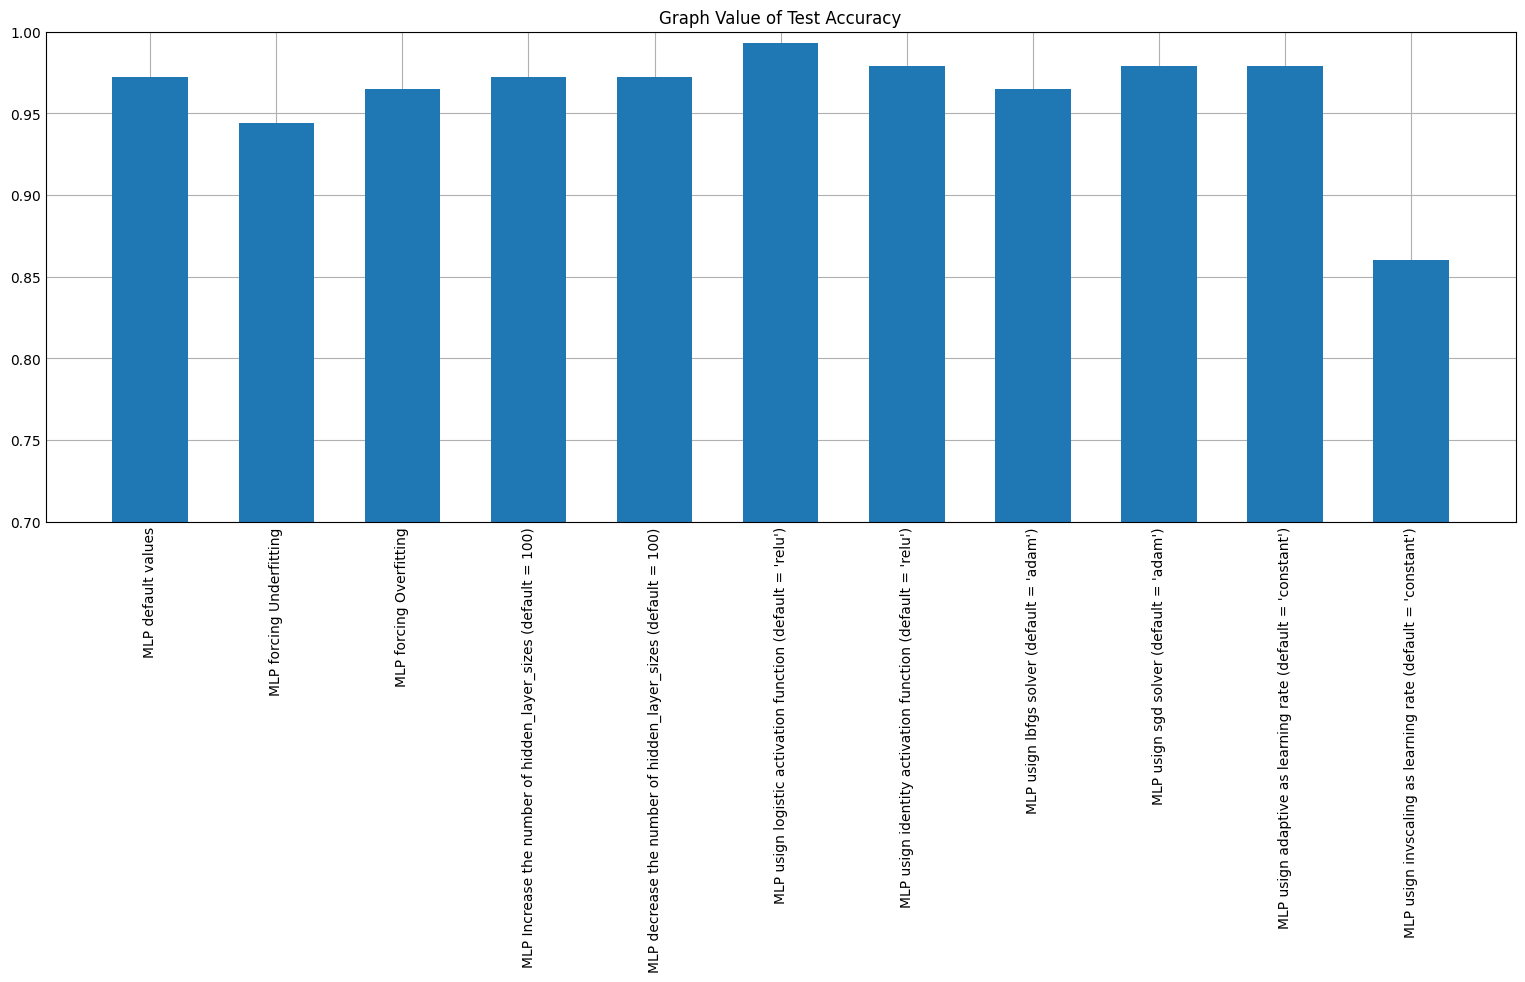

In [8]:
listPlot = [(listValidation,"Value of Cross Validation"), (listAccuracyTrain, "Value of Train Accuracy"), (listAccuracyTest, "Value of Test Accuracy")]

for info in listPlot:
  fig, ax = plt.subplots(figsize=(15,5))

  plt.title('Graph ' + info[1])
  ax.bar(listModels.keys(), info[0], width=0.6)
  ax.set(ylim=(0.7, 1), yticks=np.arange(0.7, 1, 0.05))
  plt.xticks(rotation=90, fontsize=10)

  plt.show()

#Construindo modelos mais complexos
Após a realização de testes utilizando esses parâmetros, iremos uni-los para produzir os seguintes modelos:

1. Que possua uma boa acertividade
2. Um que possua overfitting

#1. Construindo um modelo que possua boa acertividade
Para isso, após uma análise dos resultados obtidos acima, escolheremos:

- Utilizaremos o valor default para o hidden_layer_sizes
- Utilizaremos a logistic activation function
- Utilizaremos o learning rate default

Validation Score 0.9771619313771154
Accuracy train: 0.9859154929577465
Accuracy test: 0.993006993006993


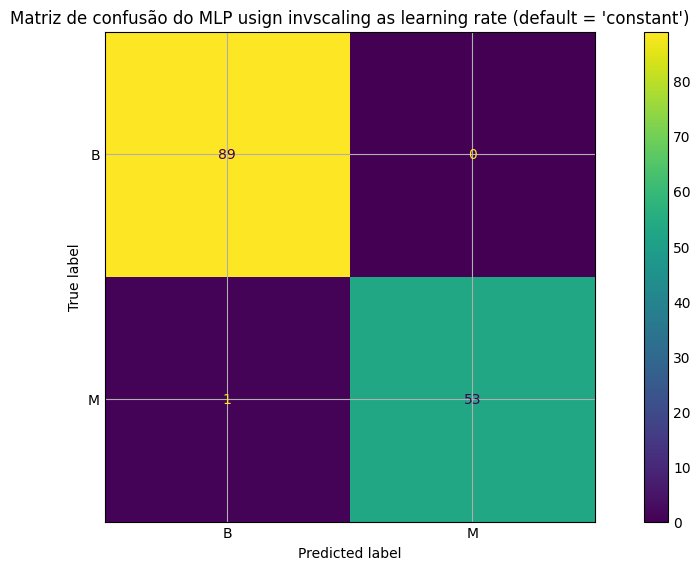

In [11]:
  model =  MLPClassifier(random_state=1, activation='logistic')
  
  scores = cross_val_score(model, dataValues,dataLabels, cv=5)
  mean_score = np.mean(scores)
  listValidation.append(mean_score)
  print("Validation Score", mean_score)

  #Trainning the Model
  model = model.fit(x_train, y_train)
  modelPredict = model.predict(x_train)
  accuracy = accuracy_score(y_train, modelPredict)
  listAccuracyTrain.append(accuracy)
  print(f"Accuracy train: {accuracy}")

  #Verify the accuracy with the data of test
  modelPredict = model.predict(x_test)
  accuracy = accuracy_score(y_test, modelPredict)
  listAccuracyTest.append(accuracy)
  print(f"Accuracy test: {accuracy}")
  
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
  _ = ax.set_title(f"Matriz de confusão do {name}")

#2. Construindo um modelo que possua um alto overfitting
- Utilizando um número alto de iterações
- utilizando um número Alto de hidden_layer_sizes
- Utilizando o solver lbfgs

Validation Score 0.9666356155876418
Accuracy train: 1.0
Accuracy test: 0.965034965034965


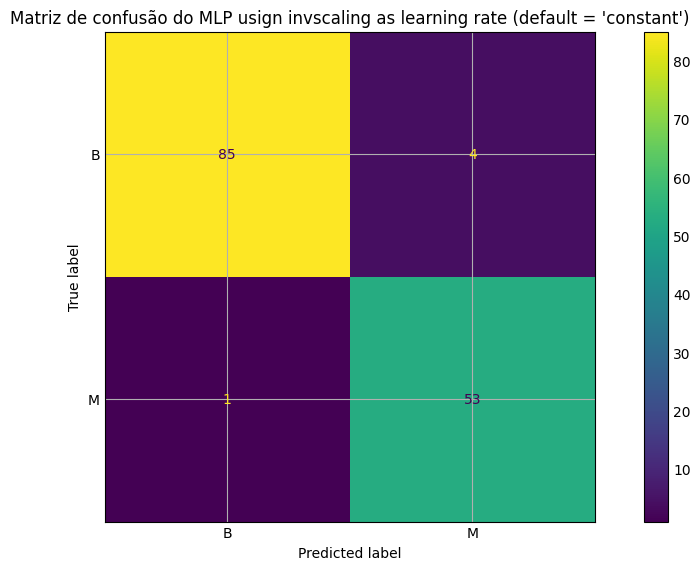

In [22]:
model = MLPClassifier(random_state=1, hidden_layer_sizes=(500,), solver='lbfgs', max_iter=10000, learning_rate='invscaling')
scores = cross_val_score(model, dataValues,dataLabels, cv=5)
mean_score = np.mean(scores)
listValidation.append(mean_score)
print("Validation Score", mean_score)

#Trainning the Model
model = model.fit(x_train, y_train)
modelPredict = model.predict(x_train)
accuracy = accuracy_score(y_train, modelPredict)
listAccuracyTrain.append(accuracy)
print(f"Accuracy train: {accuracy}")

#Verify the accuracy with the data of test
modelPredict = model.predict(x_test)
accuracy = accuracy_score(y_test, modelPredict)
listAccuracyTest.append(accuracy)
print(f"Accuracy test: {accuracy}")

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
_ = ax.set_title(f"Matriz de confusão do {name}")